<a href="https://colab.research.google.com/github/nexusls22/Assignments_AI/blob/main/BSCH_AIR_Assign1Part1_Student_Name_Student_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSCH-AIR - Assignment 1 Part 1

# Student Name: Luis Sander Student Number: 3188813


| Course 	          | BSCH                   |
|  -----------------|------------------------|  
| Stage / Year        | 4                     |
| Module 	          | AIR                   |
|Semester             |	2                     |
|Assignment           |	Assignment 01 Part 1  |
|Date of Title Issue  |	16th  Februrary, 2026        |
|Assignment Deadline  |	See Moodle |
|Assignment %         | 5 %                   |
|Assignment Submission| Upload to moodle      |

<div style="text-align: right"> Authors: A. Cronin, J. Lebron </div>

In [2]:
# Run this cell first so you have the necessary imports for the rest of the cells

# imports
import numpy as np# allow access to the numpy library to create matrices
import math
from datetime import datetime
current_time = datetime.now()
print("Libraries imported successfully. ",current_time)

Libraries imported successfully.  2026-03-01 08:10:25.201836


# Tasks
- [ ]  Complete all questions using **Tips** provided below. All questions carry equal marks.
- [ ]  Rename this file with Student Name and Student Number
- [ ]  Include Student Name and Student Number at the top of this file.
- [x]  Assignment 1 Part 2 will be issued next week.
- [x]  Assignment 1 Part 3 will be in class in 2 weeks.

# Tips

* Review lecture material and previous jupyter notebooks
* **[Use np.array as opposed to np.matrix as np.matrix will be deprecated.](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)**
* [Numpy tutorials](https://www.tutorialspoint.com/numpy/numpy_concatenate.htm)
* [Check your matrix calculations online](https://matrix.reshish.com/)
* [How to convert angles from degrees to radians](https://docs.scipy.org/doc/numpy/reference/generated/numpy.radians.html)
* [Rounding elements in a matrix/array](https://numpy.org/doc/stable/reference/generated/numpy.around.html)
* [How to stack arrays/matrixes in sequence horizontally (column wise)](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)
* [How to stack arrays in sequence vertically (row wise)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html)
* [Creating a rotation matrix in numpy](https://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/)

## Additional tips

* [Calculating an Arc-tangent](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html)
* [How to calculate exponents (squares) in Python](https://www.quora.com/How-do-I-square-in-Python)
* [Visualising Euler Angles](https://compsci290-s2016.github.io/CoursePage/Materials/EulerAnglesViz/index.html)
* [Visualising Quaternions](https://eater.net/quaternions/video/intro)
***

# Introduction

In this part of Assignment 01, you will illustrate your understanding on 2D Geometry and Representation of Rotations. Attempt all questions. Questions 1-5 relate to 2D Geometry, Questions 6-10 relate to Representation of Rotations.



# 2D Geometry

2D Geometry is used to express the robot's position and heading as well as to translate between the different coordinate frames. In 2D the pose of a robot can be uniquely defined by a position vector

$$\textbf{t}=\begin{pmatrix}x \\ y\end{pmatrix}$$

and the orientation angle $\psi$ (yaw) relative to a reference frame. At the start, the local coordinate system may be coincident with the observer's (global) coordinate system but this changes quickly as the robot moves around and rotates. Let's get a feeling for the robot moving around:

## Q1.  Matrix Representation

Assume your robot flew 4m in *x* direction, 3m in *y* direction and turned 180 degrees (counterclockwise) around its yaw axis.


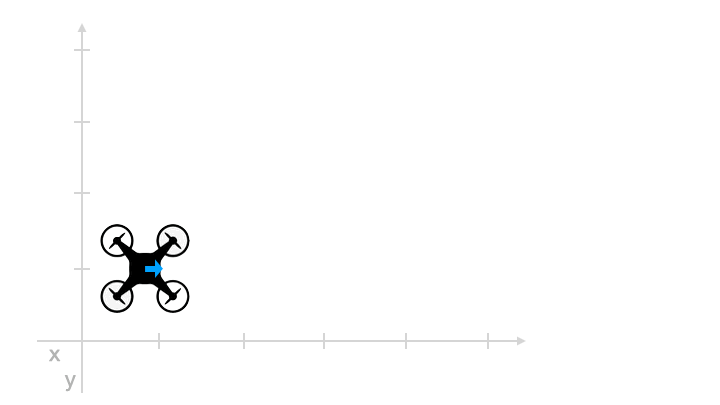

### a) Translation and Rotation

Generate and output the corresponding translation vector in the format:
$$\textbf{t}=\begin{pmatrix}x \\ y\end{pmatrix}$$

In [4]:
t = [4,3]
print('Drone positon on grid:', end=' ')

for i in range(len(t)):

    print(t[i], end=' ')

print('(X Y)')


Drone positon on grid: 4 3 (X Y)


Output a value for $\psi$ in radians, and generate and output the rotation matrix $\textbf{R}$:
$$\textbf{R}=\begin{pmatrix}cos(\psi) & -sin(\psi) \\ sin(\psi) & cos(\psi)\end{pmatrix}$$

In [11]:
# write your solution below
# create a rotation matrix in numpy using an array, see help above
pi = math.pi
radians = 180 * pi / 180
angle = 180
cos = math.cos(angle)
sin = math.sin(angle)
rm = [cos, -sin, sin, cos]

print(f'Angle 180 = {radians} radians, rotation matrix is: ', end='')

for i in range(len(rm)): 
    print(rm[i], end=' ')

print(' (X^1 Y^1 X2 Y^2)')
# don't forget to print the value of yaw in radians

Angle 180 = 3.141592653589793 radians, rotation matrix is: -0.5984600690578581 0.8011526357338304 -0.8011526357338304 -0.5984600690578581  (X^1 Y^1 X2 Y^2)


### b) Transformation
Together $\textbf{t}$  and $\textbf{R}$ form a homogeneous transformation matrix $\textbf{T}^{0}_{1}$ transforming local into global coordinates.

Generate and output the homogeneous transformation matrix using your solutions from part a):
$\textbf{T}^{0}_{1}=\begin{pmatrix}\textbf{R} & \textbf{t}\\ 0 & 1\end{pmatrix}$

In [108]:
#write your solution below:

angle = 180
htm =[rm[0], rm[1], t[0], rm[2], rm[3], t[1], 0, 0, 1]
tZO = [htm[0] * htm[1] * htm[2], htm[3] * htm[4] * htm[5], htm[6] * htm[7] * htm[8]]


def print_htm(htm):
    counter = 0
    
    for i in range(len(htm)):
        counter+=1
        for j in range(1):
            print(int(round(htm[i])), end = '\t')

            if counter == 3:
                print('\n')
                counter = 0

print('The homogenousm matrix is: ')
print_htm(htm)
# for i in range(len(htm)):
#         print (i)

The homogenousm matrix is: 
-1	1	4	

-1	-1	3	

0	0	1	



Explanation:

Your solution above should use python code and the numpy library to join the translation vector (t) and rotation matrix (R) forming the Transformation matrix T of global coordinates:
$$\textbf{T}^{0}_{1}=\begin{pmatrix}cos(180) & -sin(180) & 4\\ sin(180) & cos(180) & 3\\ 0 & 0 & 1\end{pmatrix}=\begin{pmatrix}-1 & 0 & 4\\ 0 & -1 & 3\\ 0 & 0 & 1\end{pmatrix}$$
    
If your output looks different, try rounding to the nearest whole number before printing using np.round().

## Q2. Transformation Concatenation
During the mission, the robot's pose is continuously reestimated relative to its last known pose.

The transformations describing the poses can simply be concatenated by multiplication to yield the transformation from local to global frame.

$\textbf{T}^{0}_{2} = \textbf{T}^{0}_{1} \cdot \textbf{T}^{1}_{2}$

$\textbf{T}^{0}_{1}$ with $\textbf{t}_1=\begin{pmatrix}1 \\ 2\end{pmatrix}$  and $\psi_1=45°$

$\textbf{T}^{0}_{2}$ with $\textbf{t}_2=\begin{pmatrix}-4 \\ 2\end{pmatrix}$  and $\psi_1=45°$

Output the value for $\psi$. Generate and output the resulting homogeneous transformation matrix for the example above.

In [3]:
# write your solution below:
t1 = [1, 2]
t2 = [-4, 2]
transformation_angle_q2 = 45
cos_q2 = math.cos(transformation_angle_q2)
sin_q2 = math.sin(transformation_angle_q2)

def calc_rotation_matrix(t): 
    return [cos_q2,
            sin_q2,
            t[0], 
            sin_q2,
            cos_q2, t[1],
            0, 0, 1]


tm1 = calc_rotation_matrix(t1)
tm2 = calc_rotation_matrix(t2)
tm3 = []
    
def calc_rotation_matirx_dp_q2(tm1, tm2): 
    counter = 0
    
    for i in range(len(tm1)):
        counter+=1
        
        for j in range(1):


## Cross product instead of dot 
            
            #print(int(round(tm1[i])) * int(round(tm2[i])), end = '\t')
            mrow = tm1[i] * tm2[i]
            tm3.append(mrow)
            print(mrow, end = '\t')

            if counter == 3:
                print('\n')
                counter = 0
            
    

print(f'Angel is {transformation_angle_q2}')
calc_rotation_matirx_dp_q2(tm1, tm2)

Angel is 45
0.27596319193541496	0.7240368080645851	-4	

0.7240368080645851	0.27596319193541496	4	

0	0	1	



**Explanation:**

$\textbf{T}^{0}_{1}=\begin{pmatrix}\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 1\\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 2\\ 0 & 0 & 1\end{pmatrix}$

$\textbf{T}^{1}_{2}=\begin{pmatrix}\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & -4\\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 2\\ 0 & 0 & 1\end{pmatrix}$

$\textbf{T}^{0}_{2} = \textbf{T}^{0}_{1} \cdot \textbf{T}^{1}_{2} = \begin{pmatrix}0 & -1 & -3.24264068712\\ 1 & 0 & 0.58578643762\\ 0 & 0 & 1\end{pmatrix} $

## Q3. Local to Global Transformation
Often the robot has detected a marker in its local coordinate system and we want to know where the marker is on our global map. This can be achieved by finding the translation and rotation that transforms the global into the local coordinate system and applying it to our point of interest.
$$\tilde{p}_{global}=\textbf{T}^{global}_{local} \cdot \tilde{p}_{local}$$

The robot has detected a marker at position $\tilde{p}_{local}=\begin{pmatrix}1\\ -1\\1\end{pmatrix}$ of its local coordinate system.
  
The transform is given as: $\textbf{T}^{global}_{local}= \begin{pmatrix}0 & -1 & -3 \\ 1 & 0 & 3 \\ 0 & 0 & 1\end{pmatrix}$

Where is the marker located in the global coordinate system?

In [5]:
# Write your solution below:
p_l = np.array([[1, -1, 1]])
t_gl = np.array([[0, -1, -3], [1, 0 , 3], [0, 0, 1]])

p_g = np.dot(p_l, t_gl)
print(p_g)

[[-1 -1 -5]]


## Q4. Global to Local Transformation

Moreover, we are often interested in reaching a goal position in the world coordinate frame but can only give local commands to the robot i.e. we need to translate the global to local commands in order to execute them. This can be achieved by applying the inverse rotation
$ \begin{align} v_{local}=\textbf{R}^T \cdot v_{global} \end{align}$
to the commands.

Now assume you want to fly in the *y* direction of your global coordinate frame with speed 2.7 m/s.

Given $\textbf{R}=\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}$,

What matrix command $v_{local}$ has to be issued to the robot?

In [12]:
# Write your solution below:
r = np.array([[0, 1], [-1, 0]])
v_g = 2.7

v_l = r * v_g
print(v_l)

[[ 0.   2.7]
 [-2.7  0. ]]


## Q5. Transformations in Practice
The movement of our robot can be considered a combination of Rotation and Translation, which we call a Transformation.
Consider a robot that was stationary, and now completes the following movement(s):

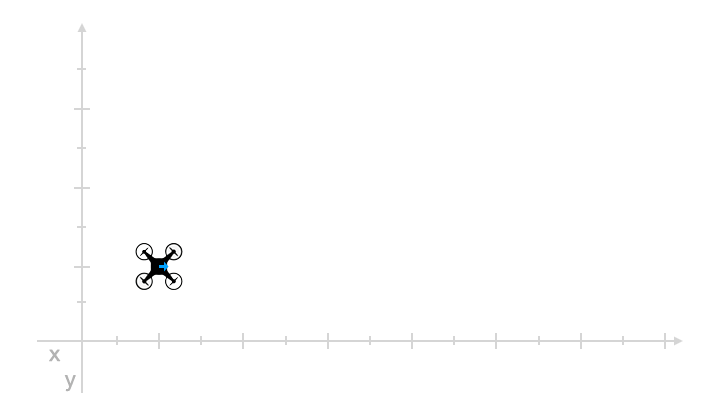


### a) Briefly describe the movement of the robot in terms of direction in x and y, and angle of rotation.

***(double click to edit this cell and write your answer below)***

Description:
First the robot rotates -90 degrees around its Z axis then its moving forward on x for 2 units and then moving to the right on the y axis for 5.5 units. The rotation does not change after the first -90 degree rotation.

### b) What is the corresponding translation vector for the robot's movement?



***(double click to edit this cell and replace the '?' below)***

Answer:  

$$\textbf{t}=\begin{pmatrix}2 \\ 5.5\end{pmatrix}$$

### c) What is the corresponding Rotation matrix for the robot's rotation?


***(double click to edit this cell and replace the '?' below)***

Answer:
$$ \psi = \quad -90 $$

$$\textbf{R}=\begin{pmatrix}cos(-90) & -sin(-90) \\ sin(-90) & cos(-90)\end{pmatrix}$$

### d) Provide the corresponding Transformation by combining your answers for part b and c.

***(double click to edit this cell and replace the '?' below)***

Answer:

$$\textbf{T}^{0}_{1}=\begin{pmatrix}R & t\\ 0 & 1\end
{pmatrix}=\begin{pmatrix}cos(-90) & -sin(-90) & 2\\ sin(-90) & cos(-90) & 5.5\\ 0 & 0 & 1\end{pmatrix}$$

### e) What matrix command would we issue to the robot if we wish to rotate 13 degrees and fly 5 meters in the x direction and 1.45 meters in the y direction?

*Hint: you will need to issue a local command to the robot:* $ \begin{align} v_{local}=\textbf{R}^T \cdot v_{global} \end{align}$

***(double click to edit this cell and replace the '?' below)***

$$ \psi = 13 \quad
\textbf{R}=\begin{pmatrix}cos(13) & -sin(13) \\ cos(13) & sin(13)\end{pmatrix} \quad
\textbf{R}^T=\begin{pmatrix}cos(13) & sin(13) \\ -sin(13) & cos(13)\end{pmatrix}  \quad
v_{global}=\begin{pmatrix}5 \\ 1.45\end{pmatrix}  $$



In [27]:
# Write your solution here:
angle = math.radians(13)
r_t = np.array([[math.cos(angle), math.sin(angle)], [-math.sin(angle), math.cos(angle)]])
v_g = np.array([[5, 1.45]])

v_l = r_t * v_g
print(v_l)

[[ 4.87185032  0.32617903]
 [-1.12475527  1.41283659]]


### f) The robot detects an obstacle which is 3 meters north of its current position. Evaluate this value in terms of the robot's local position.

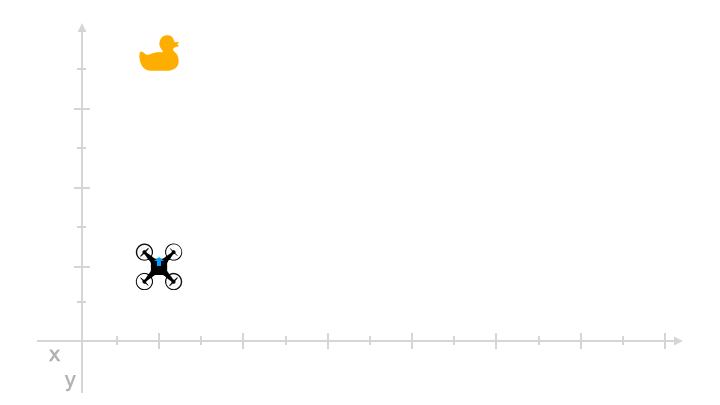


***(double click to edit this cell and replace the '?' below)***

Answer:

$\tilde{p}_{local}=\begin{pmatrix}  2.5  \\  0  \\  0 \end{pmatrix}$

# Representations of Rotations

In this part you will illustrate your understanding of 4 different rotation notations.  

* Rotation Matrix
* Euler Angle
* Axis Angle
* Quaternion

## Q6 Rotation Matrices

### a) Your quadrotor has crashed and is lying tipped over facing away from you in the field.

What rotation do you have to perform to align it with the camera facing forward and thus toward you? Calculate the rotation matrix. Explain your answer. You will need to work out, $\theta$  first, then workout 1 matrix calculation.

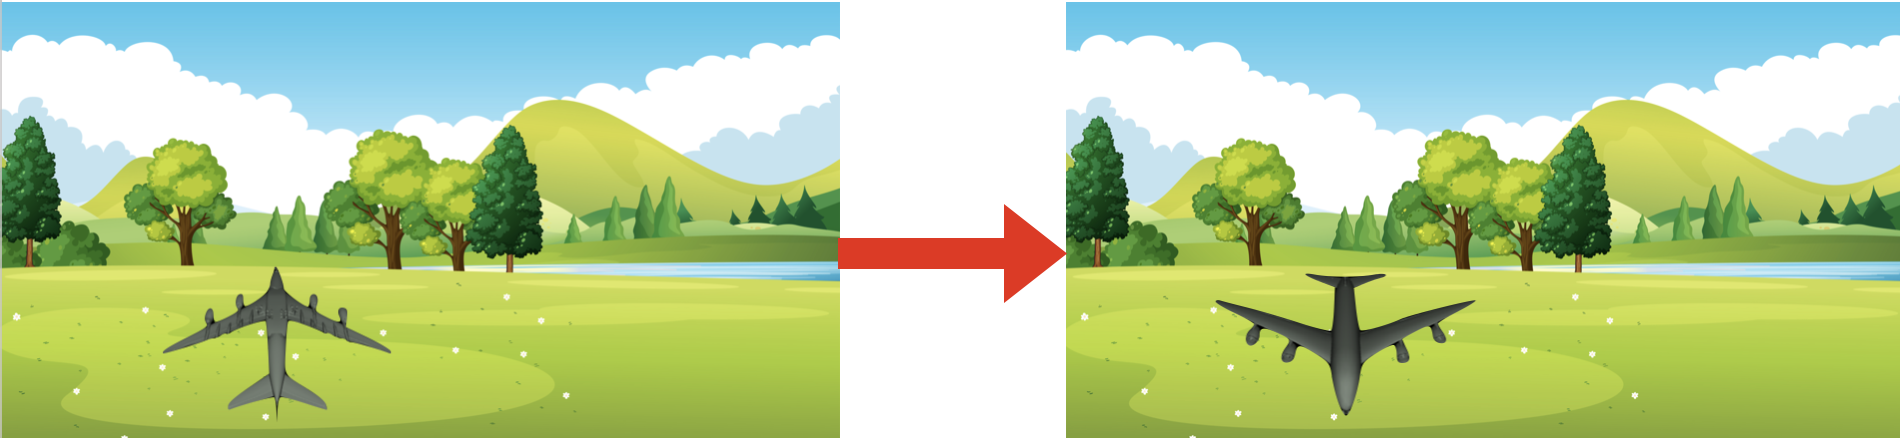

**Explanation**

*Double click to edit this cell, provide your explanation here*

In [42]:
# Write your solution below:
#I would have to tilt the quadrotors pitch -180 degrees. 

theta = math.radians(-180)
r_theta = np.array([[int(math.cos(theta)), int(-math.sin(theta))], [int(math.sin(theta)), int(math.cos(theta))]])
print(r_theta)

[[-1  0]
 [ 0 -1]]


### b)  How many more parameters do 3D rotation matrices have compared to minimal representations? Clearly explain its advantages and disadvantages.

### Solution:
*Double click to edit this cell, provide your explanation here*

Number: 6 additional 

Explanation: A 3D rotation matrix (RM) has 9 parameters, instead of 3 compared to its minimal representation.


* Advantages:
  - RMs are easy to compose, where RM1 * RM2 is equal to RM_NEW
  - Easy to rotate a vector with vector with RM, the deviation v' of vector v is equal to RM * v
  - Numeric stable values for transformations.
    

* Disadvantages:
  - Must maintain orthorgonalty 
  - More memory than minimal representation
  - Harder to interpret intuitively

## Q7. Euler Angles
### a ) How many different Euler angle conventions are there? Explain your answer with examples.

### Solution:
*Double click to edit this cell, provide your explanation here*

Amount: 3

Explanation: 

### b) How would the rotation in Q1a) be parameterized with Euler angles in the Roll Pitch Yaw convention? Explain your answer.

$(Roll, Pitch, Yaw)$   <-- *(double click to edit this cell with your answer, replace with the degrees of each angle)*

Explanation:

## c) Euler to Rotation Matrix

Given the RPY Euler angles in degree (35, 0, 90) for Roll, Pitch and Yaw respectively: compute the **rotation matrix**. You will have to multiply 2 or 3 matrices.

In [ ]:
# Write your solution below:


## Q8. Angle/Axis Representation
### a) How many parameters has the Angle-Axis representation?

### Solution:
*Double click to edit this cell, provide your explanation here*

Amount:

Explanation:

## Q9. Quaternions

Quaternions are 4D vectors $q=(q_w,q_x,q_y,q_z)=(r,v)$ consisting of a real part $r$ and a vector part $v$. They can be multiplied according to: $q_1q_2=(r_1r_2-v_1 \cdot v_2,r_1v_2+r_2v_1+v_1 \times v_2)$

conjugated according to: $\bar{q}=(r,-v)$

and inverted according to: $q^{-1}=\frac{\bar{q}}{q \bar{q}}$

If moreover $\left\Vert  n \right\Vert=1$ the quaternion is a unit quaternion which simpifies the inversion to:
$q^{-1}=\bar{q}$

A quaternion can be computed from Axis/angle representation :
$q=\begin{pmatrix}\cos(\theta/2) \\ \sin(\theta/2) n_x  \\ \sin(\theta/2) n_y \\ \sin(\theta/2) n_z \end{pmatrix}$

Which quaternion (4 dimensional column matrix) describes a 180 degree rotation around the y axis?

## Q10. Advantages of Representations

For each of the following, tick the answers that apply and **don't forget to include your explanation.** Answers that are ticked with no explanation will receive 0 marks.

Below is an example of how to tick
- [x] Example
- [ ] Empty tick box



### a) Which representations are easy to concatenate? Tick all that apply. And explain your answer:

- [ ] Rotation Matrices
- [ ] Euler Angles
- [ ] Angle-Axis
- [ ] Quaternions



**Explanation**

*Edit this cell and explain how each of the representations are concatenated*

### b) Which representations can be minimal? Explain your answer.
- [ ] Rotation Matrices
- [ ] Euler Angles
- [ ] Angle-Axis
- [ ] Quaternions

**Explanation**

*Edit this cell and for each representation, explain why they are or are not considered "minimal"*



### c) Which representations are easy to invert?
- [ ] Rotation Matrices
- [ ] Euler Angles
- [ ] Angle-Axis
- [ ] Quaternions

**Explanation**

*Edit this cell and for each representation, explain how they are inverted*




### d) Which representation is unique?
- [ ] Rotation Matrices
- [ ] Euler Angles
- [ ] Angle-Axis
- [ ] Quaternions

**Explanation**

*Edit this cell and for each representation, explain why it is or isn't considered "unique"*

